# ライブラリ読み込み

In [2]:
import numpy as np
import pandas as pd; pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

# utility
import time
import copy as cp
from tqdm import tqdm
from collections import defaultdict
import glob
import os
import sys
from sys import stderr

# 乱数
rng = np.random.RandomState(1234)
random_state = 42

# pytorch
# conda install pytorch torchvision -c pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
from torchvision import datasets, transforms, models

# 囲碁ライブラリ
from sgfmill import sgf
from sgfmill import boards

# ルートに移動
%cd /Users/keimy/git/humanized-models-for-board-games
%pwd


/Users/keimy/git/humanized-models-for-board-games


'/Users/keimy/git/humanized-models-for-board-games'

# visualize by sgfmill

In [2]:
dir_path = "./datasets/kgs201904"
files = glob.glob(f"{dir_path}/*.sgf")

len(files)

1255

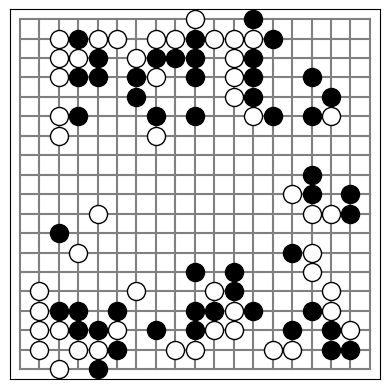

In [3]:
from src.board import visualize_board_at_move, get_board_at_move

with open(files[10], "r") as file:
    game = sgf.Sgf_game.from_string(file.read())
    visualize_board_at_move(game, 100)
   


In [4]:
# 19路盤
game.get_size()

19

In [5]:
# レーティングの取得
root_node = game.get_root()

# プロパティが存在するかどうかを確認してから取得
black_rank = root_node.get_raw_property_map().get("BR", [None])[0]
white_rank = root_node.get_raw_property_map().get("WR", [None])[0]

# 結果の表示（オプション）
print(f"Black player's rank: {black_rank}")
print(f"White player's rank: {white_rank}")


Black player's rank: None
White player's rank: b'7d'


# preprocess data

In [3]:
dir_path = "./datasets/kgs201904"
files = glob.glob(f"{dir_path}/*.sgf")

len(files)

1255

In [12]:
from src.board import visualize_board_at_move, get_board_at_move

arrays_at_move = []
for file in tqdm(files):
    with open(file, "r") as file:
        game = sgf.Sgf_game.from_string(file.read())
        # ゲームの手数 50-100手を集める
        n_max = min(100, len(game.get_main_sequence()) - 1)
        n_min = min(50, n_max-1)
        for i in range(n_min, n_max):
            try:
                black_matrix, white_matrix = get_board_at_move(game, i)
                array_at_move = [np.array(black_matrix), np.array(white_matrix)]
                arrays_at_move.append(array_at_move)    
            except: ValueError


100%|██████████| 1255/1255 [00:26<00:00, 46.90it/s]


In [16]:
# テンソルに変換して保存
tensors_at_move = np.stack(arrays_at_move, axis=0)
np.save('./preprocess/tensors_at_move.npy', tensors_at_move)

tensors_at_move.shape

(55191, 2, 19, 19)

# VAE model

In [18]:
# .npy ファイルからデータをロード
tensors = np.load('./preprocess/tensors_at_move.npy')

tensors.shape

(55191, 2, 19, 19)

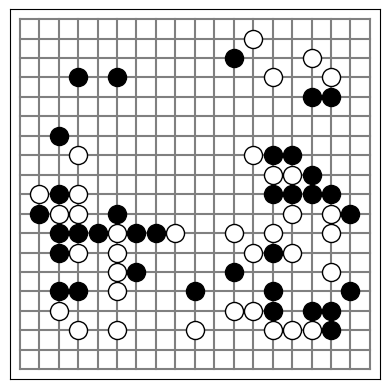

0

In [37]:
from src.board import visualize_matrix

tensor_at_move = tensors[20]
visualize_matrix(tensor_at_move[0], tensor_at_move[1])


# Pyaq
https://github.com/ymgaq/Pyaq/tree/master

In [3]:
sgf_list = import_sgf("../datasets/kgs201904")

feeds = sgf2feed(sgf_list)
# 
# feedsは３要素のリスト
feeds[0].shape, feeds[1].shape, feeds[2].shape

NameError: name 'BSIZE' is not defined